In [24]:
import pandas as pd
import io
table = pd.read_csv("/Users/ricardoferreira/Downloads/Iris.csv")

In [25]:
table.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
table = table.drop('Id', 1)

In [27]:
table.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
# Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = np.array(table)

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

scaler = StandardScaler()

y = np.array(pd.get_dummies(data[:, data.shape[1]-1])).astype(np.float32)
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

scaler.fit(x) # ajuste do scaler para pré-processamento

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


In [36]:
# [3] MLP: topologia e treinamento
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

print('Ajustando a topologia...')
num_x = train_x.shape[1]
num_y = train_y.shape[1]
print('Entradas = %i\nSaídas = %i' % (num_x, num_y))

while(True):
  num_hidden_layers = int(input('Número de camadas ocultas: '))
  if(num_hidden_layers>0):
    break

if(num_hidden_layers==1):
  while(True):
    topology = [int(input('Neurônios na camada oculta: '))]
    if(topology[0]>0):
      break
else:
  topology = []
  for i in range(num_hidden_layers):
    while(True):
      num = int(input('Neurônios na %iª camada oculta: ' % (i+1)))
      if(num>0):
        topology.append(num)
        break

print('\n\nTreinamento...')

epochs = int(input('Número de épocas de treinamento: '))

# inicialização do modelo
Model = MLPClassifier(hidden_layer_sizes=tuple(topology), max_iter=epochs, alpha=0.1,
                     solver='sgd', learning_rate_init=0.01, momentum=0.9, learning_rate='adaptive', verbose=0,  random_state=121) # verbose=1 exibe o log de treinamento
#learn at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

topology.insert(0, num_x)
topology.append(num_y)

# pré-processamento
p_train_x = scaler.transform(train_x)

# treinando o modelo
model = Model.fit(p_train_x, train_y)

print(model)
print('Topologia da MLP =', topology)

# exibindo a curva de perda logarítmica
plt.title('Histórico de Perda Logarítmica')
plt.xlabel('épocas')
plt.ylabel('perda')

Ajustando a topologia...
Entradas = 4
Saídas = 3
Número de camadas ocultas: 2
Neurônios na 1ª camada oculta: 3
Neurônios na 2ª camada oculta: 4


Treinamento...
Número de épocas de treinamento: 2
MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=2, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=121, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)
('Topologia da MLP =', [4, 3, 4, 3])


/Users/ricardoferreira/Downloads/ifood-data-business-analyst-test/venvifood/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'perda')

Error in callback <function post_execute at 0x11338b758> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

# **Análise:** Conjunto de Treinamento

              precision    recall  f1-score   support

           0       0.09      0.18      0.12        39
           1       0.00      0.00      0.00        34
           2       0.11      0.05      0.07        39

   micro avg       0.10      0.08      0.09       112
   macro avg       0.07      0.08      0.06       112
weighted avg       0.07      0.08      0.07       112
 samples avg       0.07      0.08      0.07       112

('A acur\xc3\xa1cia \xc3\xa9 ', 0.0625)


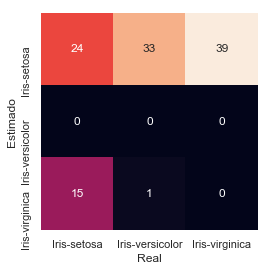

In [37]:
# [4] Análise do conjunto de treinamento
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

train_est_y = model.predict(p_train_x)

# matriz de confusão
mat = confusion_matrix(train_y.argmax(axis=1), train_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia

# **Análise:** Conjunto de Teste

              precision    recall  f1-score   support

           0       0.04      0.09      0.06        11
           1       0.00      0.00      0.00        16
           2       0.07      0.09      0.08        11

   micro avg       0.05      0.05      0.05        38
   macro avg       0.04      0.06      0.05        38
weighted avg       0.03      0.05      0.04        38
 samples avg       0.04      0.05      0.04        38

('A acur\xc3\xa1cia \xc3\xa9 ', 0.02631578947368421)


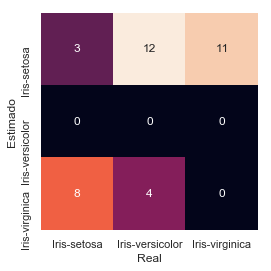

In [38]:
# [5] Análise do conjunto de teste
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# pré-processamento
p_test_x = scaler.transform(test_x)

test_est_y = model.predict(p_test_x)

# matriz de confusão
mat = confusion_matrix(test_y.argmax(axis=1), test_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia
